# Compare sorters with some dataset generated with MEArec

Alessio Paolo Buccino author of [MEArec](https://github.com/alejoe91/MEArec) have generated some dataset

Here a comparison on the file **recordings_50cells_SqMEA-10-15um_60.0_10.0uV_27-03-2019_13_31.h5**


In [2]:
import time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import spiketoolkit as st
import spikeextractors as se
from spiketoolkit.comparison import (setup_comparison_study, run_study_sorters,
            aggregate_sorting_comparison, aggregate_performances_table)

%matplotlib notebook

In [3]:
p = '/media/samuel/SamCNRS/DataSpikeSorting/mearec/'
study_folder = p + 'study_mearec'

## Step 1 : setup study folder

The file have been downloaded in the current directory.

Note: this file have a 3D geometry for teh probe. Many sorters work only with 2D.
So here we remove the first dimenssion of "location" in the recording.


In [ ]:
mearec_filename = p + 'recordings_50cells_SqMEA-10-15um_60.0_10.0uV_27-03-2019_13_31.h5'

rec0  = se.MEArecRecordingExtractor(mearec_filename, locs_2d=False)
gt_sorting0 = se.MEArecSortingExtractor(mearec_filename)
for chan in rec0.get_channel_ids():
    loc = rec0.get_channel_property(chan, 'location')
    rec0.set_channel_property(chan, 'location', loc[1:])

gt_dict = {'rec0' : (rec0, gt_sorting0) }

setup_comparison_study(study_folder, gt_dict)


## Step 2 : run all sorter

This run all sorter on all recording and store the results in a working folder.

In [5]:
# sorter_list = ['tridesclous', 'herdingspikes','klusta', 'mountainsort4', 'spykingcircus']
# 'kilosort', 'kilosort2', 'ironclust' are not tested because I don't have matlab

sorter_list = ['tridesclous', 'herdingspikes', 'mountainsort4']
run_study_sorters(study_folder, sorter_list, mode='keep', engine='loop')

## Step3 : collect comparisons

This collect all results for all **(rec_name, sorter_name)** pair and apply the SortingComparison class for each.

This also concatenate performances in several dataframes.

In [6]:
comparisons = aggregate_sorting_comparison(study_folder, exhaustive_gt=True)

for (rec_name, sorter_name), comp in comparisons.items():
    print(rec_name, sorter_name)
    comp.print_summary()
    comp.plot_confusion_matrix()

## Step 4 : collect tables

**dataframes** is a dict that contain several results formated in dataframes:
  * run_times : time for computing each one
  * perf_pooled_with_sum: performance with method **pooled_with_sum**
  * perf_pooled_with_average: performance with method **pooled_with_average**
  * nb_units_above_threshold: count how many units detect with a treshold on a perf columns.

In [ ]:
dataframes = aggregate_performances_table(study_folder, exhaustive_gt=True)

In [7]:
dataframes['run_times']

,,run_time
rec_name,sorter_name,
rec0,tridesclous,281.442423


In [8]:
dataframes['perf_pooled_with_sum']

,,tp_rate,fn_rate,cl_rate,fp_rate,accuracy,sensitivity,precision,miss_rate,false_discovery_rate
rec_name,sorter_name,,,,,,,,,
rec0,tridesclous,0.811206,0.150572,0.0382221,0.153226,0.727536,0.843444,0.841123,0.156556,0.158877


In [9]:
dataframes['perf_pooled_with_average']

,,tp_rate,fn_rate,cl_rate,fp_rate,accuracy,sensitivity,precision,miss_rate,false_discovery_rate
rec_name,sorter_name,,,,,,,,,
rec0,tridesclous,0.772974,0.19037,0.0366555,0.113771,0.738957,0.806837,0.892139,0.193163,0.107861


In [10]:
dataframes['count_units']

,,nb_gt,nb_sorter,nb_well_detected,nb_fake,nb_bad
rec_name,sorter_name,,,,,
rec0,tridesclous,50,50,24,0,8


## Step 5: inspect result by spiketrain

For finer exploration, we can also compute for all **(rec_name, sorter_name)** pair the performance with method=**by_spiketrain**.

This give a give result for each units of the ground truth.

In [11]:
for (rec_name, sorter_name), comp in comparisons.items():
    print(rec_name, sorter_name)
    perf = comp.get_performance(method='by_spiketrain')
    display(perf)

rec0 tridesclous


,tp_rate,fn_rate,cl_rate,fp_rate,accuracy,sensitivity,precision,miss_rate,false_discovery_rate
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
1,0.845758,0.010283,0.143959,0.000000,0.987988,0.987988,1.000000,0.012012,0.000000
2,0.951220,0.002439,0.046341,0.002439,0.994898,0.997442,0.997442,0.002558,0.002558
3,0.837838,0.010811,0.151351,0.016216,0.968750,0.987261,0.981013,0.012739,0.018987
4,0.995690,0.000000,0.004310,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
5,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
6,0.981203,0.000000,0.018797,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
7,0.934641,0.003268,0.062092,0.003268,0.993056,0.996516,0.996516,0.003484,0.003484
8,0.843333,0.040000,0.116667,0.010000,0.944030,0.954717,0.988281,0.045283,0.011719
9,0.966049,0.009259,0.024691,0.490741,0.658947,0.990506,0.663136,0.009494,0.336864


In [12]:
for (rec_name, sorter_name), comp in comparisons.items():
    print(rec_name, sorter_name)
    perf = comp.get_performance(method='raw_count')
    display(perf)

rec0 tridesclous


,tp,fn,cl,fp,nb_gt,nb_other,other_id
0,0,228,0,0,228,0,-1
1,329,4,56,0,389,332,0
2,390,1,19,1,410,396,32
3,155,2,28,3,185,163,3
4,231,0,1,0,232,231,1
5,0,234,0,0,234,0,-1
6,261,0,5,0,266,261,2
7,286,1,19,1,306,303,10
8,253,12,35,3,300,259,13
9,313,3,8,159,324,530,43


## Step 6 : easy plot with seaborn

With the seaborn package, it is very easy to summary with plot dataframes.

Here some basic example for performances and run times.

### Run times

Text(0.5, 1.0, 'Run times (s)')

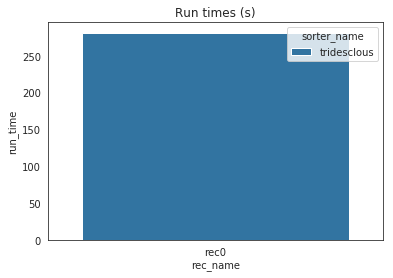

In [13]:
run_times = dataframes['run_times'].reset_index()
fig, ax = plt.subplots()
sn.barplot(data=run_times, x='rec_name', y='run_time', hue='sorter_name', ax=ax)
ax.set_title('Run times (s)')

### True positive rate

(0, 1)

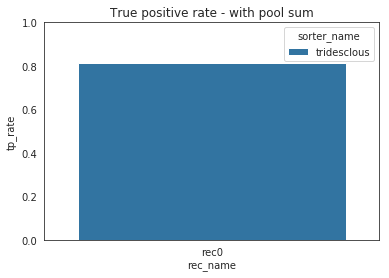

In [14]:
perfs = dataframes['perf_pooled_with_sum'].reset_index()
fig, ax = plt.subplots()
sn.barplot(data=perfs, x='rec_name', y='tp_rate', hue='sorter_name', ax=ax)
ax.set_title('True positive rate - with pool sum')
ax.set_ylim(0, 1)

(0, 1)

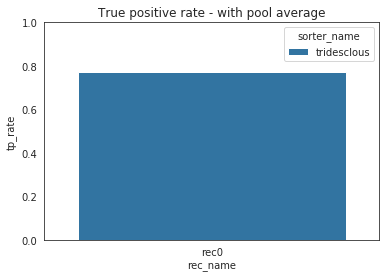

In [15]:
perfs = dataframes['perf_pooled_with_average'].reset_index()
fig, ax = plt.subplots()
sn.barplot(data=perfs, x='rec_name', y='tp_rate', hue='sorter_name', ax=ax)
ax.set_title('True positive rate - with pool average')
ax.set_ylim(0, 1)

### Accuracy

(0, 1)

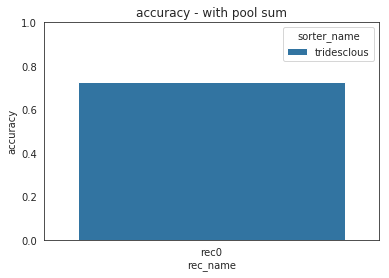

In [16]:
perfs = dataframes['perf_pooled_with_sum'].reset_index()
fig, ax = plt.subplots()
ax = sn.barplot(data=perfs, x='rec_name', y='accuracy', hue='sorter_name', ax=ax)
ax.set_title('accuracy - with pool sum')
ax.set_ylim(0, 1)

### How many units detected above threshold

The max is 50 cells.

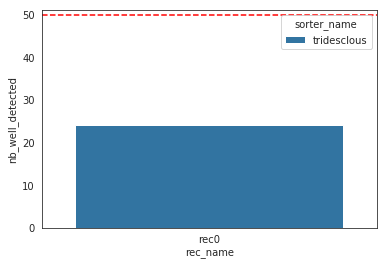

In [17]:
perfs = dataframes['count_units'].reset_index()

fig, ax = plt.subplots()
ax = sn.barplot(data=perfs, x='rec_name', y='nb_well_detected', hue='sorter_name', ax=ax)
ax.set_ylim(0, 51)
ax.axhline(50, ls='--', color='red')

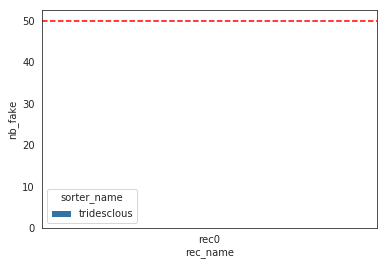

In [18]:
perfs = dataframes['count_units'].reset_index()

fig, ax = plt.subplots()
ax = sn.barplot(data=perfs, x='rec_name', y='nb_fake', hue='sorter_name', ax=ax)
ax.axhline(50, ls='--', color='red')

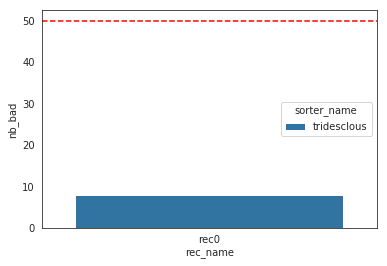

In [19]:
perfs = dataframes['count_units'].reset_index()

fig, ax = plt.subplots()
ax = sn.barplot(data=perfs, x='rec_name', y='nb_bad', hue='sorter_name', ax=ax)
ax.axhline(50, ls='--', color='red')